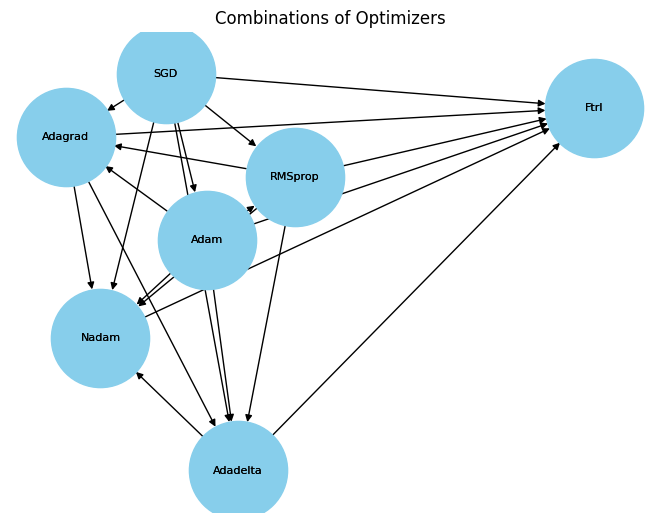

In [6]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt

import tensorflow as tf

def get_optimizer_arguments(optimizer):
    args = []
    optimizer_class = getattr(tf.keras.optimizers, optimizer)
    for key, value in optimizer_class.__init__.__annotations__.items():
        args.append(key)
    return args

def generate_optimizer_combinations(optimizers):
    G = nx.DiGraph()

    for optimizer in optimizers:
        optimizer_args = get_optimizer_arguments(optimizer)
        G.add_node(optimizer, args=optimizer_args)

    for combination in itertools.combinations(optimizers, 2):
        G.add_edge(combination[0], combination[1])

    return G

def plot_optimizer_combinations(G):
    pos = nx.spring_layout(G)

    node_labels = {n: "\n".join([n] + G.nodes[n]["args"]) for n in G.nodes()}

    nx.draw(G, pos, with_labels=True, node_size=5000, node_color='skyblue', font_size=8)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)

    plt.title("Combinations of Optimizers")
    plt.axis("off")
    plt.show()

optimizers = [
    'SGD',
    'Adam',
    'RMSprop',
    'Adagrad',
    'Adadelta',
    'Nadam',
    'Ftrl',  # Utilisez 'Ftrl' au lieu de 'FTRL' en TensorFlow 2.x
    #'LBFGS',
    #'Rprop',
    #'SGD with Momentum'
]

G = generate_optimizer_combinations(optimizers)
plot_optimizer_combinations(G)


In [9]:
import tensorflow as tf
import inspect

def get_optimizer_arguments(optimizer_name):
    optimizer_class = getattr(tf.keras.optimizers, optimizer_name)
    optimizer_init = optimizer_class.__init__

    if optimizer_init is not None:
        argspec = inspect.getfullargspec(optimizer_init)
        arguments = argspec.args[1:]  # Ignore 'self' parameter
        return arguments
    else:
        return []

optimizers = [
    'SGD',
    'Adam',
    'RMSprop',
    'Adagrad',
    'Adadelta',
    'Nadam',
    'Ftrl',
    #'LBFGS',
    #'Rprop',
    #'SGD with Momentum'
]

for optimizer in optimizers:
    arguments = get_optimizer_arguments(optimizer)
    print(f"Optimizer: {optimizer}")
    print(f"Arguments: {arguments}")
    print()


Optimizer: SGD
Arguments: ['learning_rate', 'momentum', 'nesterov', 'weight_decay', 'clipnorm', 'clipvalue', 'global_clipnorm', 'use_ema', 'ema_momentum', 'ema_overwrite_frequency', 'jit_compile', 'name']

Optimizer: Adam
Arguments: ['learning_rate', 'beta_1', 'beta_2', 'epsilon', 'amsgrad', 'weight_decay', 'clipnorm', 'clipvalue', 'global_clipnorm', 'use_ema', 'ema_momentum', 'ema_overwrite_frequency', 'jit_compile', 'name']

Optimizer: RMSprop
Arguments: ['learning_rate', 'rho', 'momentum', 'epsilon', 'centered', 'weight_decay', 'clipnorm', 'clipvalue', 'global_clipnorm', 'use_ema', 'ema_momentum', 'ema_overwrite_frequency', 'jit_compile', 'name']

Optimizer: Adagrad
Arguments: ['learning_rate', 'initial_accumulator_value', 'epsilon', 'weight_decay', 'clipnorm', 'clipvalue', 'global_clipnorm', 'use_ema', 'ema_momentum', 'ema_overwrite_frequency', 'jit_compile', 'name']

Optimizer: Adadelta
Arguments: ['learning_rate', 'rho', 'epsilon', 'weight_decay', 'clipnorm', 'clipvalue', 'global

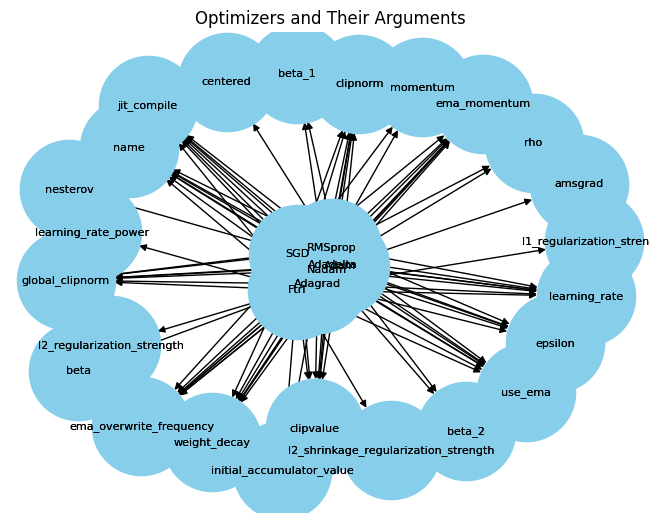

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
import inspect

def get_optimizer_arguments(optimizer_name):
    optimizer_class = getattr(tf.keras.optimizers, optimizer_name)
    optimizer_init = optimizer_class.__init__

    if optimizer_init is not None:
        argspec = inspect.getfullargspec(optimizer_init)
        arguments = argspec.args[1:]  # Ignore 'self' parameter
        return arguments
    else:
        return []

def create_optimizer_graph(optimizers):
    G = nx.DiGraph()

    for optimizer in optimizers:
        G.add_node(optimizer)

    for optimizer in optimizers:
        arguments = get_optimizer_arguments(optimizer)
        for argument in arguments:
            G.add_edge(optimizer, argument)

    return G

def plot_optimizer_graph(G):
    pos = nx.spring_layout(G)
    node_labels = {n: n for n in G.nodes()}

    nx.draw(G, pos, with_labels=True, node_size=5000, node_color='skyblue', font_size=8)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)

    plt.title("Optimizers and Their Arguments")
    plt.axis("off")
    plt.show()

optimizers = [
    'SGD',
    'Adam',
    'RMSprop',
    'Adagrad',
    'Adadelta',
    'Nadam',
    'Ftrl',
    #'Rprop',
    #'SGD with Momentum'
]

G = create_optimizer_graph(optimizers)
plot_optimizer_graph(G)


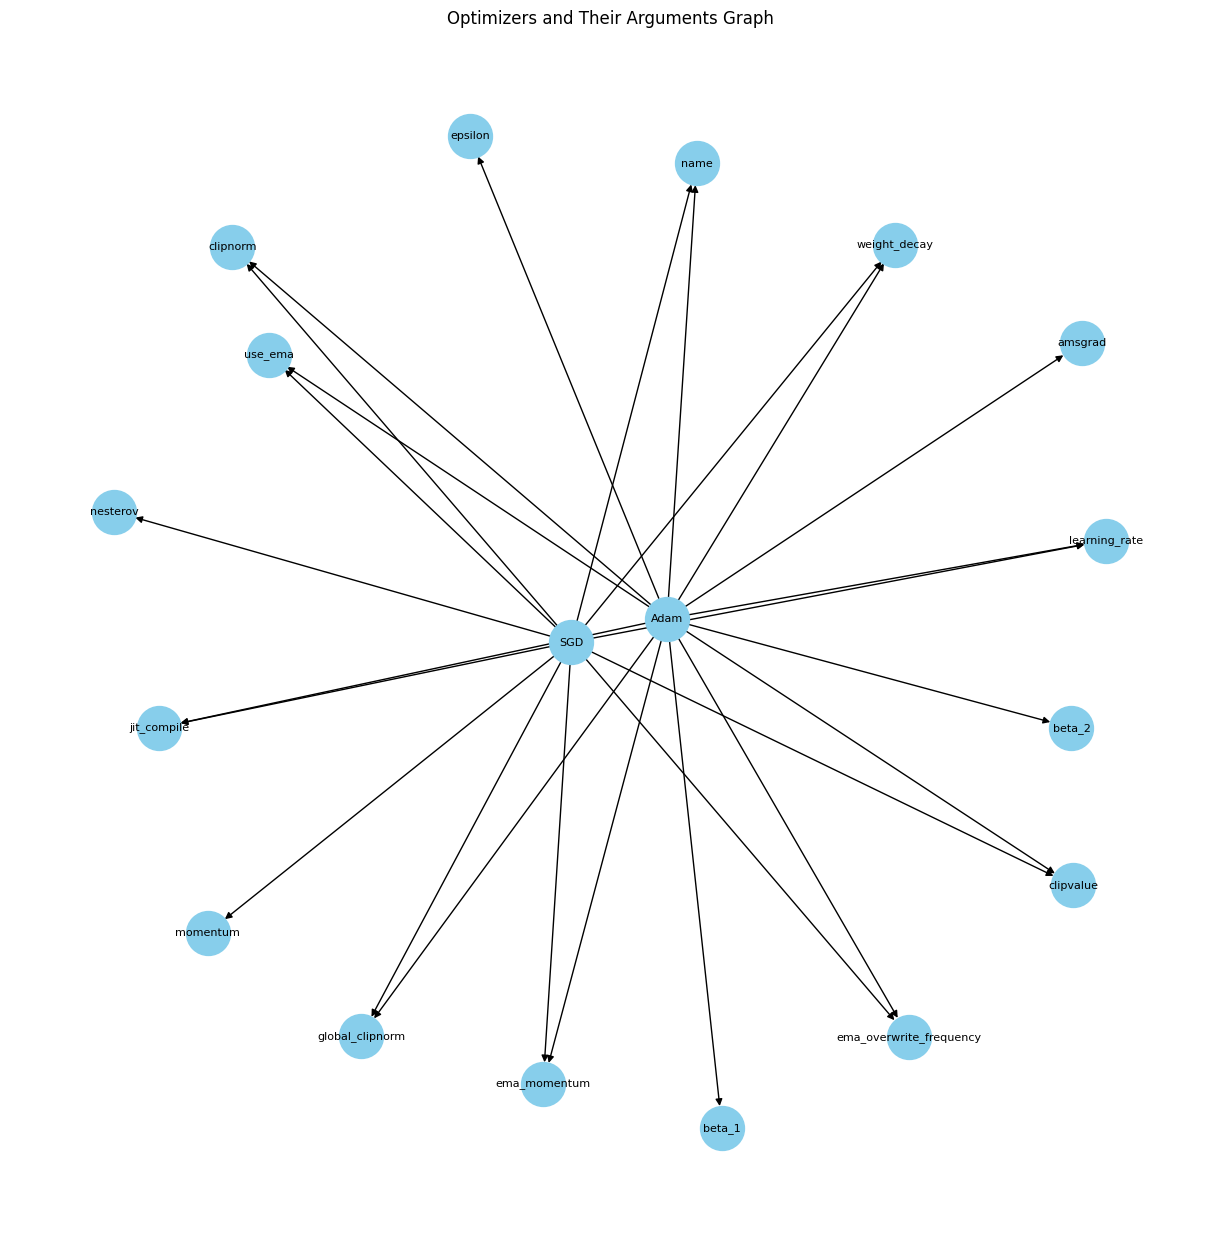

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
import inspect

def get_optimizer_arguments(optimizer_name):
    optimizer_class = getattr(tf.keras.optimizers, optimizer_name)
    optimizer_init = optimizer_class.__init__

    if optimizer_init is not None:
        argspec = inspect.getfullargspec(optimizer_init)
        arguments = argspec.args[1:]  # Ignore 'self' parameter
        return arguments
    else:
        return []

def create_optimizer_graph(optimizers):
    G = nx.DiGraph()

    for optimizer in optimizers:
        G.add_node(optimizer)
        arguments = get_optimizer_arguments(optimizer)
        for argument in arguments:
            G.add_node(argument)
            G.add_edge(optimizer, argument)

    return G

def plot_optimizer_graph(G):
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=8)
    plt.title("Optimizers and Their Arguments Graph")
    plt.axis("off")
    plt.show()

optimizers = [
    'SGD',
    'Adam',
    #'RMSprop',
    #'Adagrad',
    #'Adadelta',
    #'Nadam',
    #'Ftrl',
    # 'LBFGS',  # Commenté car LBFGS nécessite des arguments spéciaux
    # 'Rprop',   # Commenté car Rprop nécessite des arguments spéciaux
    # 'SGD with Momentum'  # Commenté car il ne s'agit pas d'un optimiseur standard
]

G = create_optimizer_graph(optimizers)
plot_optimizer_graph(G)


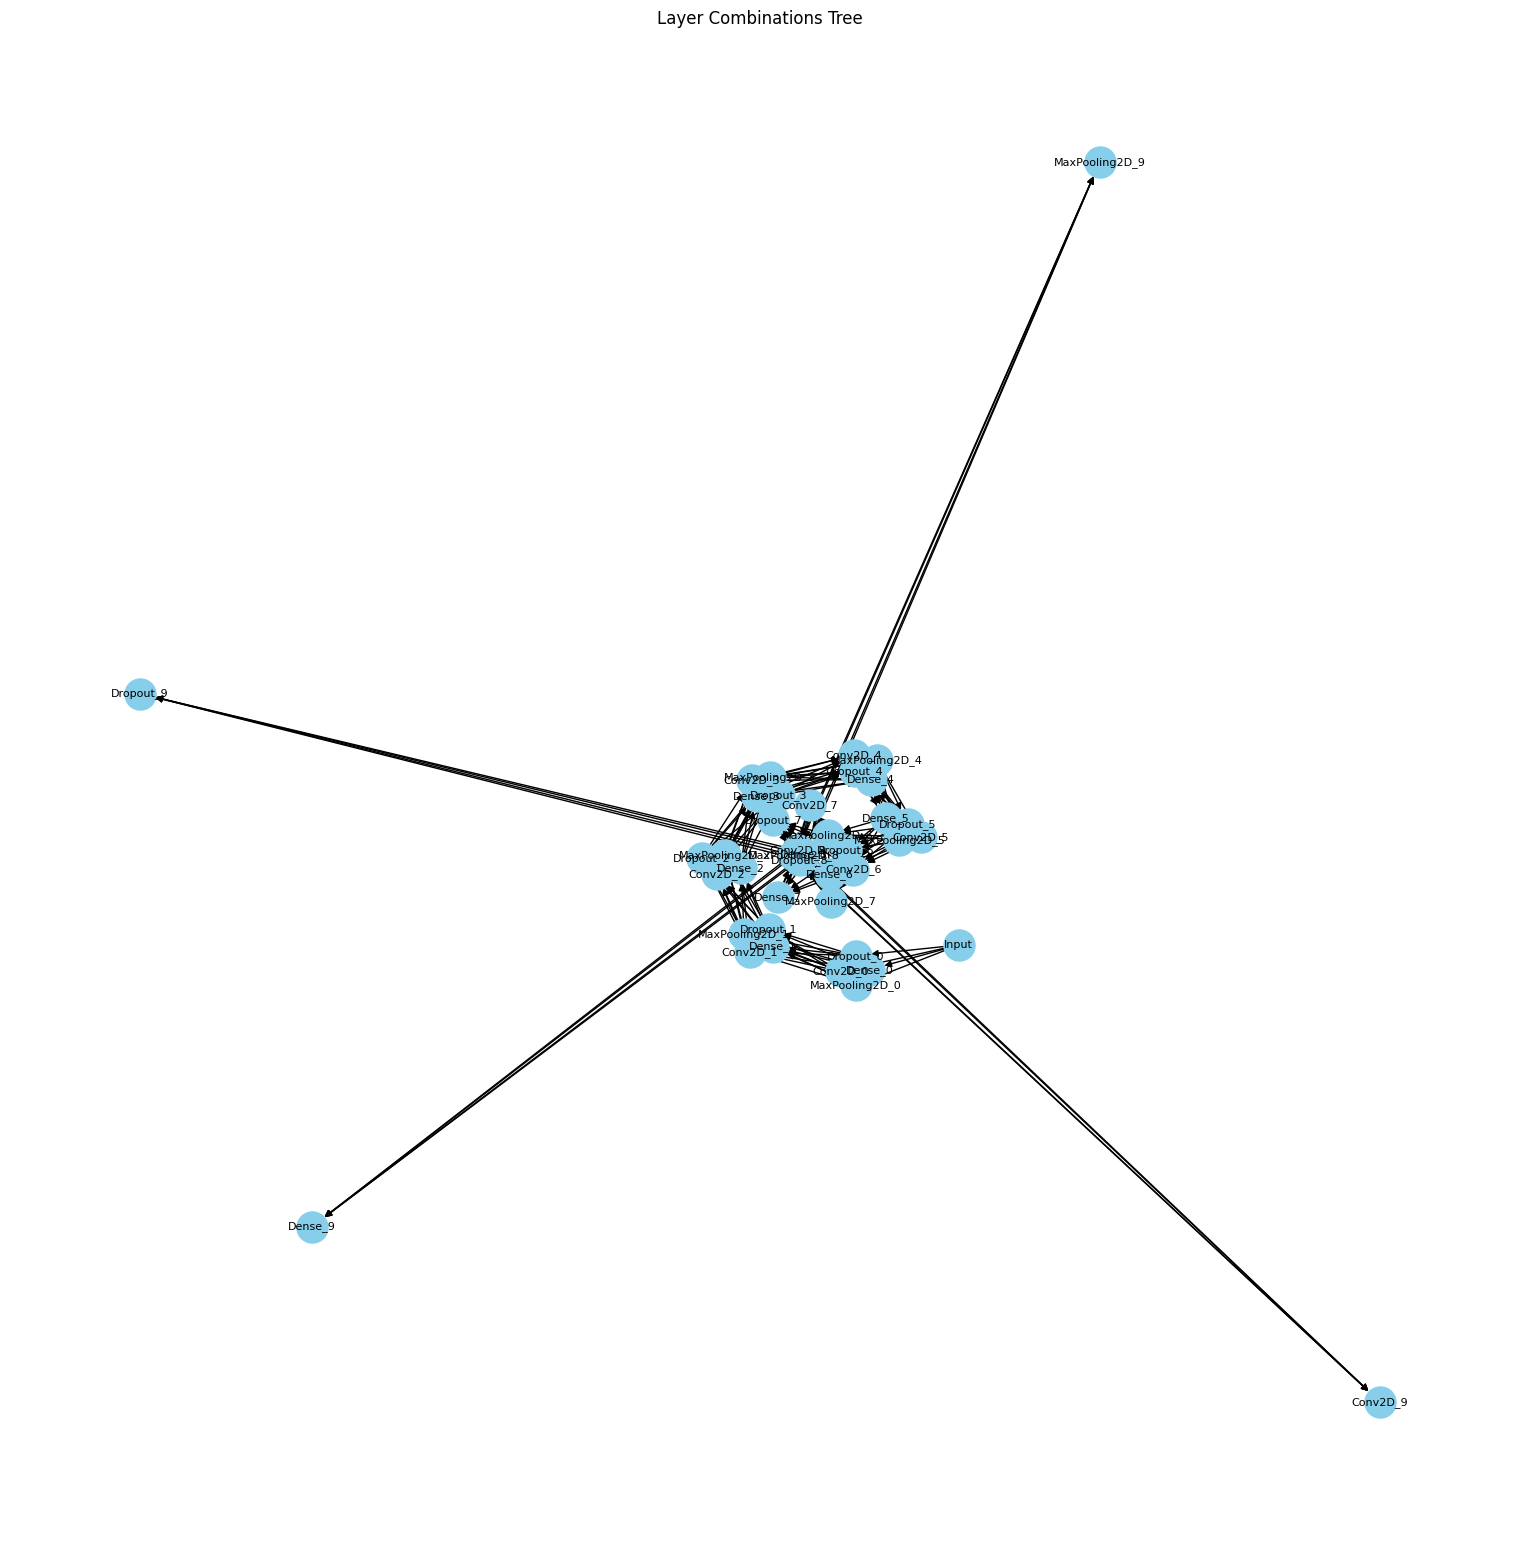

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

def create_layer_combinations_tree(depth, layer_types):
    G = nx.DiGraph()
    G.add_node("Input")

    def add_layers(parent_node, current_depth):
        if current_depth == depth:
            return

        for layer_type in layer_types:
            layer_name = f"{layer_type}_{current_depth}"
            G.add_node(layer_name)
            G.add_edge(parent_node, layer_name)
            add_layers(layer_name, current_depth + 1)

    add_layers("Input", 0)

    return G

def plot_layer_combinations_tree(G):
    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=8)
    plt.title("Layer Combinations Tree")
    plt.axis("off")
    plt.show()

depth = 10  # Profondeur du réseau
layer_types = ["Conv2D", "Dense", "MaxPooling2D", "Dropout"]  # Types de couches possibles

G = create_layer_combinations_tree(depth, layer_types)
plot_layer_combinations_tree(G)


In [31]:
import networkx as nx
import itertools
import tensorflow as tf

# Définir les types de couches possibles
layer_types = ["Conv2D", "Dense", "MaxPooling2D", "Dropout"]
# Définir les largeurs de couches possibles
layer_widths = [2, 4, 8, 16, 32, 64, 128, 256, 512]

# Créer une fonction pour générer toutes les combinaisons de couches possibles à une certaine profondeur
def generate_layer_combinations(depth):
    combinations = []
    for d in range(1, depth + 1):
        combinations += list(itertools.product(layer_types, repeat=d))
    return combinations

# Créer une fonction pour générer des modèles à partir de combinaisons de couches
def create_models(combinations, widths):
    models = []
    for combination in combinations:
        for width in widths:
            model = tf.keras.Sequential()
            for layer_type in combination:
                if layer_type == "Conv2D":
                    model.add(tf.keras.layers.Conv2D(filters=width, kernel_size=(3, 3), activation='relu', padding='same'))
                elif layer_type == "Dense":
                    model.add(tf.keras.layers.Dense(width, activation='relu'))
                elif layer_type == "MaxPooling2D":
                    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
                elif layer_type == "Dropout":
                    model.add(tf.keras.layers.Dropout(0.25))
            models.append(model)
    return models

# Générer toutes les combinaisons de couches possibles pour une profondeur donnée
depth = 3  # Profondeur du réseau
combinations = generate_layer_combinations(depth)

# Générer les modèles correspondants aux combinaisons de couches et aux largeurs
models = create_models(combinations, layer_widths)

# Afficher le nombre total de modèles générés
print(f"Nombre total de modèles générés pour une profondeur de {depth} : {len(models)}")


Nombre total de modèles générés pour une profondeur de 3 : 756


In [32]:
import networkx as nx
import itertools
import tensorflow as tf

# Définir les types de couches possibles
layer_types = ["Conv2D", "Dense", "MaxPooling2D", "Dropout"]
# Définir les largeurs de couches possibles
layer_widths = [2, 4, 8, 16, 32, 64, 128, 256, 512]

# Créer une fonction pour générer toutes les combinaisons de couches possibles à une certaine profondeur
def generate_layer_combinations(depth):
    combinations = []
    for d in range(1, depth + 1):
        combinations += list(itertools.product(layer_types, repeat=d))
    return combinations

# Créer une fonction pour générer des modèles à partir de combinaisons de couches
def create_models(combinations, widths):
    models = []
    for combination in combinations:
        for width in widths:
            model = tf.keras.Sequential()
            for layer_type in combination:
                if layer_type == "Conv2D":
                    model.add(tf.keras.layers.Conv2D(filters=width, kernel_size=(3, 3), activation='relu', padding='same'))
                elif layer_type == "Dense":
                    model.add(tf.keras.layers.Dense(width, activation='relu'))
                elif layer_type == "MaxPooling2D":
                    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
                elif layer_type == "Dropout":
                    model.add(tf.keras.layers.Dropout(0.25))
            models.append(model)
    return models

# Générer toutes les combinaisons de couches possibles pour une profondeur donnée
depth = 3  # Profondeur du réseau
combinations = generate_layer_combinations(depth)

# Afficher toutes les combinaisons de couches
for i, combination in enumerate(combinations):
    print(f"Combinaison {i + 1}: {combination}")


Combinaison 1: ('Conv2D',)
Combinaison 2: ('Dense',)
Combinaison 3: ('MaxPooling2D',)
Combinaison 4: ('Dropout',)
Combinaison 5: ('Conv2D', 'Conv2D')
Combinaison 6: ('Conv2D', 'Dense')
Combinaison 7: ('Conv2D', 'MaxPooling2D')
Combinaison 8: ('Conv2D', 'Dropout')
Combinaison 9: ('Dense', 'Conv2D')
Combinaison 10: ('Dense', 'Dense')
Combinaison 11: ('Dense', 'MaxPooling2D')
Combinaison 12: ('Dense', 'Dropout')
Combinaison 13: ('MaxPooling2D', 'Conv2D')
Combinaison 14: ('MaxPooling2D', 'Dense')
Combinaison 15: ('MaxPooling2D', 'MaxPooling2D')
Combinaison 16: ('MaxPooling2D', 'Dropout')
Combinaison 17: ('Dropout', 'Conv2D')
Combinaison 18: ('Dropout', 'Dense')
Combinaison 19: ('Dropout', 'MaxPooling2D')
Combinaison 20: ('Dropout', 'Dropout')
Combinaison 21: ('Conv2D', 'Conv2D', 'Conv2D')
Combinaison 22: ('Conv2D', 'Conv2D', 'Dense')
Combinaison 23: ('Conv2D', 'Conv2D', 'MaxPooling2D')
Combinaison 24: ('Conv2D', 'Conv2D', 'Dropout')
Combinaison 25: ('Conv2D', 'Dense', 'Conv2D')
Combinaison

In [1]:
import itertools

# Définir les types de couches possibles
layer_types = ["Conv2D", "Dense", "MaxPooling2D", "Dropout"]
# Définir les largeurs de couches possibles
layer_widths = [2, 4, 8, 16, 32, 64, 128, 256, 512]
# Profondeur du réseau
depth = 3

# Créer une fonction récursive pour générer toutes les combinaisons de couches possibles
def generate_all_layer_combinations(layer_types, depth):
    if depth == 0:
        return [[]]

    combinations = []
    smaller_combinations = generate_all_layer_combinations(layer_types, depth - 1)

    for layer_type in layer_types:
        for width in layer_widths:
            for smaller_combination in smaller_combinations:
                combinations.append([f"{layer_type}({width})"] + smaller_combination)

    return combinations

# Générer toutes les combinaisons possibles de couches pour la profondeur spécifiée
combinations = generate_all_layer_combinations(layer_types, depth)

# Afficher toutes les combinaisons de couches
for i, combination in enumerate(combinations):
    print(f"Combinaison {i + 1}: {combination}")


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Combinaison 41657: ['Dropout(64)', 'Conv2D(64)', 'Conv2D(32)']
Combinaison 41658: ['Dropout(64)', 'Conv2D(64)', 'Conv2D(64)']
Combinaison 41659: ['Dropout(64)', 'Conv2D(64)', 'Conv2D(128)']
Combinaison 41660: ['Dropout(64)', 'Conv2D(64)', 'Conv2D(256)']
Combinaison 41661: ['Dropout(64)', 'Conv2D(64)', 'Conv2D(512)']
Combinaison 41662: ['Dropout(64)', 'Conv2D(64)', 'Dense(2)']
Combinaison 41663: ['Dropout(64)', 'Conv2D(64)', 'Dense(4)']
Combinaison 41664: ['Dropout(64)', 'Conv2D(64)', 'Dense(8)']
Combinaison 41665: ['Dropout(64)', 'Conv2D(64)', 'Dense(16)']
Combinaison 41666: ['Dropout(64)', 'Conv2D(64)', 'Dense(32)']
Combinaison 41667: ['Dropout(64)', 'Conv2D(64)', 'Dense(64)']
Combinaison 41668: ['Dropout(64)', 'Conv2D(64)', 'Dense(128)']
Combinaison 41669: ['Dropout(64)', 'Conv2D(64)', 'Dense(256)']
Combinaison 41670: ['Dropout(64)', 'Conv2D(64)', 'Dense(512)']
Combinaison 41671: ['Dropout(64)', 'Conv2D(64)

In [2]:
import itertools
import tensorflow as tf

# Obtenez tous les types de couches disponibles dans Keras
all_layer_types = [name for name in dir(tf.keras.layers) if name[0].isupper()]
# Supprimez les couches "InputLayer" et "Wrapper" car elles ne sont généralement pas utilisées directement
layer_types = [layer_type for layer_type in all_layer_types if layer_type not in {"InputLayer", "Wrapper"}]

# Définir les largeurs de couches possibles
layer_widths = [2]#, 4, 8, 16, 32, 64, 128, 256, 512]
# Profondeur du réseau
depth = 3

# Créer une fonction récursive pour générer toutes les combinaisons de couches possibles
def generate_all_layer_combinations(layer_types, depth):
    if depth == 0:
        return [[]]

    combinations = []
    smaller_combinations = generate_all_layer_combinations(layer_types, depth - 1)

    for layer_type in layer_types:
        for width in layer_widths:
            for smaller_combination in smaller_combinations:
                combinations.append([f"{layer_type}({width})"] + smaller_combination)

    return combinations

# Créer une fonction pour créer un modèle à partir d'une combinaison de couches
def create_model(layers):
    model = tf.keras.Sequential()
    try:
        for layer in layers:
            model.add(eval(layer))
        model.add(tf.keras.layers.Dense(10, activation='softmax'))  # Exemple de couche de sortie
    except Exception as e:
        print(f"Erreur lors de la création du modèle : {e}")
        return None
    return model

# Générer toutes les combinaisons possibles de couches pour la profondeur spécifiée
combinations = generate_all_layer_combinations(layer_types, depth)

# Afficher tous les types de couches disponibles
print("Types de couches disponibles :")
for layer_type in all_layer_types:
    print(layer_type)

# Afficher le nombre total de modèles générés
total_models = len(combinations)
print(f"Nombre total de modèles générés : {total_models}")

# Afficher toutes les combinaisons de couches
for i, combination in enumerate(combinations):
    print(f"Combinaison {i + 1}: {combination}")
    model = create_model(combination)
    if model is not None:
        model.summary()  # Afficher le résumé du modèle généré


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Erreur lors de la création du modèle : name 'AbstractRNNCell' is not defined
Combinaison 4870: ['AbstractRNNCell(2)', 'Cropping3D(2)', 'SpatialDropout3D(2)']
Erreur lors de la création du modèle : name 'AbstractRNNCell' is not defined
Combinaison 4871: ['AbstractRNNCell(2)', 'Cropping3D(2)', 'SpectralNormalization(2)']
Erreur lors de la création du modèle : name 'AbstractRNNCell' is not defined
Combinaison 4872: ['AbstractRNNCell(2)', 'Cropping3D(2)', 'StackedRNNCells(2)']
Erreur lors de la création du modèle : name 'AbstractRNNCell' is not defined
Combinaison 4873: ['AbstractRNNCell(2)', 'Cropping3D(2)', 'StringLookup(2)']
Erreur lors de la création du modèle : name 'AbstractRNNCell' is not defined
Combinaison 4874: ['AbstractRNNCell(2)', 'Cropping3D(2)', 'Subtract(2)']
Erreur lors de la création du modèle : name 'AbstractRNNCell' is not defined
Combinaison 4875: ['AbstractRNNCell(2)', 'Cropping3D(2)', 'Text

KeyboardInterrupt: ignored